#### Loading all the required libraries

In [1]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import matplotlib.cbook
import seaborn as sns
import numpy as np
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

#### Loading the excel data into data frame

In [2]:
#Step 1:  Load data into the dataframe
crimeRatedf = pd.read_csv("crimeratesbystate-formatted.csv")
educationdf = pd.read_csv("education.csv", index_col="state")
educationdf = educationdf.drop("United States", axis=0)

### Histograms

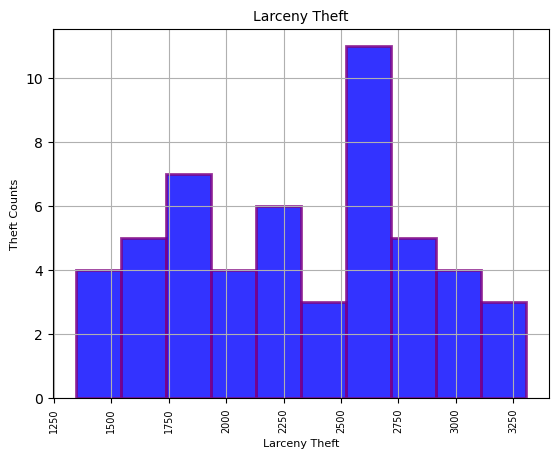

In [3]:
crimeRatedf.hist(column='larceny_theft', bins=10, color='blue', alpha=0.8, label='Value', edgecolor='purple', linewidth=2)
plt.xticks(rotation=90)
plt.xticks(fontsize=7)
plt.xlabel("Larceny Theft", size=8)
plt.ylabel("Theft Counts", size=8)
plt.title("Larceny Theft", size=10)
plt.show()

#### Box plots

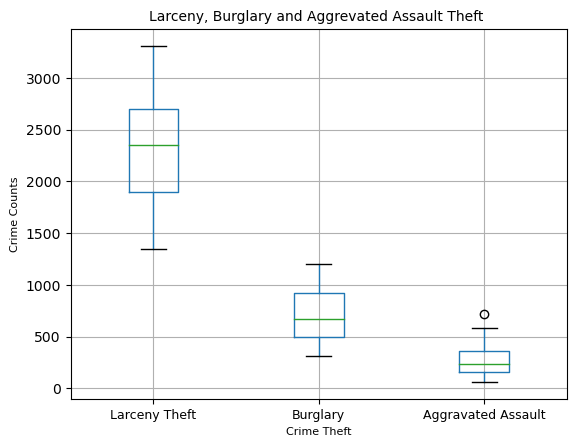

In [4]:
fig, ax = plt.subplots()
boxplot = crimeRatedf.boxplot(column=['larceny_theft','burglary','aggravated_assault'], return_type='axes')
plt.xticks(rotation=0)
plt.xticks(fontsize=9)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Larceny Theft'
labels[1] = 'Burglary'
labels[2] = 'Aggravated Assault'
ax.set_xticklabels(labels)
plt.xlabel("Crime Theft", size=8)
plt.ylabel("Crime Counts", size=8)
plt.title("Larceny, Burglary and Aggrevated Assault Theft ", size=10)
plt.show()

#### Bullet charts

In [5]:
def bulletgraphplot(data=None, limits=None, labels=None, axis_label=None, title=None,
                size=(5, 3), palette=None, formatter=None, target_color="gray",
                bar_color="black", label_color="gray"):
    # Determine the max value for adjusting the bar height
    # Dividing by 10 seems to work pretty well
    h = limits[-1] / 10

    # Use the green palette as a sensible default
    if palette is None:
        palette = sns.light_palette("green", len(limits), reverse=False)

    # Must be able to handle one or many data sets via multiple subplots
    if len(data) == 1:
        fig, ax = plt.subplots(figsize=size, sharex=True)
    else:
        fig, axarr = plt.subplots(len(data), figsize=size, sharex=True)

    # Add each bullet graph bar to a subplot
    for idx, item in enumerate(data):

        # Get the axis from the array of axes returned when the plot is created
        if len(data) > 1:
            ax = axarr[idx]

        # Formatting to get rid of extra marking clutter
        ax.set_aspect('equal')
        ax.set_yticklabels([item[0]])
        ax.set_yticks([1])
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)

        prev_limit = 0
        for idx2, lim in enumerate(limits):
            # Draw the bar
            ax.barh([1], lim - prev_limit, left=prev_limit, height=h,
                    color=palette[idx2])
            prev_limit = lim
        rects = ax.patches
        # The last item in the list is the value we're measuring
        # Draw the value we're measuring
        ax.barh([1], item[1], height=(h / 3), color=bar_color)

        # Need the ymin and max in order to make sure the target marker
        # fits
        ymin, ymax = ax.get_ylim()
        ax.vlines(
            item[2], ymin * .9, ymax * .9, linewidth=1.5, color=target_color)

    # Now make some labels
    if labels is not None:
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                -height * .4,
                label,
                ha='center',
                va='bottom',
                color=label_color)
    if formatter:
        ax.xaxis.set_major_formatter(formatter)
    if axis_label:
        ax.set_xlabel(axis_label)
    if title:
        fig.suptitle(title, fontsize=14)
    fig.subplots_adjust(hspace=0)

<ipython-input-5-2ccbc4171121>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([item[0]])


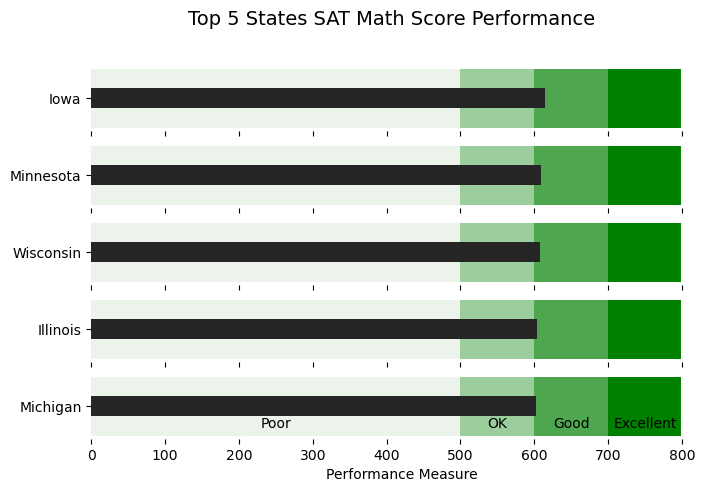

In [6]:
eduudf = educationdf.sort_values(['math'], ascending=False).head(5)
eduudf = eduudf.reset_index()
edudf = eduudf[['state','math']]
edoutdf = edudf.copy()
edoutdf["tgtval"] = 800
edlst = edoutdf.values.tolist()
bulletgraphplot(edlst, limits=[500, 600, 700, 800],
            labels=["Poor", "OK", "Good", "Excellent"], size=(8,5),
            axis_label="Performance Measure", label_color="black",
            bar_color="#252525", target_color='#f7f7f7',
            title="Top 5 States SAT Math Score Performance")
plt.show()

#### Bubble Chart

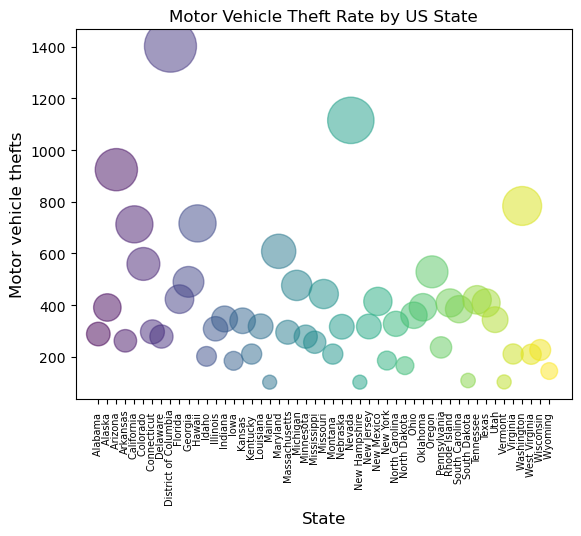

In [7]:
delete_row = crimeRatedf[crimeRatedf["state"]=="United States "].index
dcrimedf = crimeRatedf.drop(delete_row)
color = dcrimedf.index.values.tolist()
plt.scatter('state', 'motor_vehicle_theft',
             s='motor_vehicle_theft',
             c=color,
             alpha=0.5, data=dcrimedf)
plt.xticks(rotation=90)
plt.xticks(fontsize=7)
plt.xlabel("State", size=12)
plt.ylabel("Motor vehicle thefts", size=12)
plt.title("Motor Vehicle Theft Rate by US State", size=12)
plt.show()